#Project Description

''
Example
''

## Stochastic Gradient Descent in Continuous time -- Scopus Article remake

**Abstract**

Stochastic gradient descent in continuous time **(SGDCT)** provides a computationally eficient method for the statistical learning of continuous-Time models, which are widely used in science, engineering, and **finance**. 

The SGDCT algorithm follows a (noisy) descent direction along a continuous stream of data. SGDCT performs an online parameter update in continuous time with the parameter updates **θt**, satisfying a stochastic diffierential equation. 

We prove that **limδ rg(θ) = 0**, where **g** is anatural objective function for the estimation of the continuous-Time dynamics. 

The convergence proof leverages ergodicity by using an appropriate Poisson equation to help describe the evolution of the parameters for large times. 

For certain continuous-Time problems, SGDCT has some promising advantages compared to a traditional stochastic gradient descent algorithm. 

This paper mainly focuses **on applications in finance**, such as model estimation for stocks, bonds, interest rates, and financial derivatives. 

SGDCT can also be used for the optimization of high-dimensional continuous-time models, such as American options. As an example application, SGDCT is combined with a deep neural network to price high-dimensional American options (up to 100 dimensions).

Author keywords

*American options; Deep learning; Machine learning; Statistical learning; Stochastic difierential equations; Stochastic gradient descent*

source: https://www.scopus.com/record/display.uri?eid=2-s2.0-85041577966&origin=inward&txGid=b958c8de8483660591ca27e29596028b

In [2]:
#Action items

- The **gradient** is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change fastest. 
- We call our process **gradient descent** because it uses the gradient to descend the loss curve towards a minimum. 
- **Stochastic** means "determined by chance." Our training is stochastic because the minibatches are random samples from the dataset. And that's why it's called SGD! 

# Example 1

In [3]:
'''
Sample code
'''
import time
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
def stochastic_gradient_descent(feature_array, target_array, to_predict, learn_rate_type="invscaling"):
    """ Computes Ordinary Least SquaresLinear Regression with Stochastic Gradient Descent as the optimization algorithm.
        :param feature_array: array with all feature vectors used to train the model
        :param target_array: array with all target vectors used to train the model
        :param to_predict: feature vector that is not contained in the training set. Used to make a new prediction
        :param learn_rate_type: algorithm used to set the learning rate at each iteration.
        :return: Predicted cooking time for the vector to_predict and the R-squared of the model.
"""    # Pipeline of transformations to apply to an estimator. First applies Standard Scaling to the feature array.
    # Then, when the model is fitting the data it runs Stochastic Gradient Descent as the optimization algorithm.
    # The estimator is always the last element.
    
    start_time = time.time()
    linear_regression_pipeline = make_pipeline(StandardScaler(), SGDRegressor(learning_rate=learn_rate_type))
    
    linear_regression_pipeline.fit(feature_array, target_array)
    stop_time = time.time()
     
    print("Total runtime: %.6fs" % (stop_time - start_time))
    print("Algorithm used to set the learning rate: " + learn_rate_type)
    print("Model Coeffiecients: " + str(linear_regression_pipeline[1].coef_))
    print("Number of iterations: " + str(linear_regression_pipeline[1].n_iter_))    # Make a prediction for a feature vector not in the training set
    prediction = np.round(linear_regression_pipeline.predict(to_predict), 0)[0]
    print("Predicted cooking time: " + str(prediction) + " minutes")    
    r_squared = np.round(linear_regression_pipeline.score(feature_array, target_array).reshape(-1, 1)[0][0], 2)
    print("R-squared: " + str(r_squared))
    


In [5]:
feature_array = [[500, 80, 30, 10],
                 [550, 75, 25, 0],
                 [475, 90, 35, 20],
                 [450, 80, 20,25],
                 [465, 75, 30, 0],
                 [525, 65, 40, 15],
                 [400, 85, 33, 0],
                 [500, 60, 30, 30],
                 [435, 45, 25, 0]]

In [6]:
target_array = [17, 11, 21, 23, 22, 15, 25, 18, 16]

In [7]:
to_predict = [[510, 50, 35, 10]]


In [8]:
stochastic_gradient_descent(feature_array, target_array, to_predict)

Total runtime: 0.005951s
Algorithm used to set the learning rate: invscaling
Model Coeffiecients: [-3.43412357  1.65035997  0.28225406  1.10689218]
Number of iterations: 249
Predicted cooking time: 13.0 minutes
R-squared: 0.9


In [9]:
stochastic_gradient_descent(feature_array, target_array, to_predict)

Total runtime: 0.004002s
Algorithm used to set the learning rate: invscaling
Model Coeffiecients: [-3.43748524  1.64858234  0.2837066   1.10873186]
Number of iterations: 248
Predicted cooking time: 13.0 minutes
R-squared: 0.9


In [10]:
stochastic_gradient_descent(feature_array, target_array, to_predict, learn_rate_type="adaptive")

Total runtime: 0.002002s
Algorithm used to set the learning rate: adaptive
Model Coeffiecients: [-3.49474564  1.64238774  0.30445277  1.15701067]
Number of iterations: 95
Predicted cooking time: 13.0 minutes
R-squared: 0.91


'''
With the limitations of Gradient Descent in mind, Stochastic Gradient Descent emerged as a way to tackle performance issues and speed up the convergence in large datasets.

Stochastic Gradient Descent is a probabilistic approximation of Gradient Descent. It is an approximation because, at each step, the algorithm calculates the gradient for one observation picked at random, instead of calculating the gradient for the entire dataset.
'''
src: https://towardsdatascience.com/stochastic-gradient-descent-explained-in-real-life-predicting-your-pizzas-cooking-time-b7639d5e6a32

## Example 2

In [11]:
def gradient_loop(runs=3):
    """ Repeatedly computes the gradient of a function
        Computes the gradient given the starting points and then uses the result of the gradient to feed the next iteration, with new points.
        Prints out the result of the function at each iteration
        :param: runs: number of iterations to compute
    """    # starting points
    x = np.array([1, 2, 3])
    
    # quadratic function, a parabola
    y = x**2
    
    for run in range(0, runs):
        print("Iter " + str(run) + ": Y=" + str(y))        # compute first derivative
        x = np.gradient(y, 1)        # update the function output
        y = x ** 2


In [12]:
gradient_loop(runs=10)

Iter 0: Y=[1 4 9]
Iter 1: Y=[ 9. 16. 25.]
Iter 2: Y=[49. 64. 81.]
Iter 3: Y=[225. 256. 289.]
Iter 4: Y=[ 961. 1024. 1089.]
Iter 5: Y=[3969. 4096. 4225.]
Iter 6: Y=[16129. 16384. 16641.]
Iter 7: Y=[65025. 65536. 66049.]
Iter 8: Y=[261121. 262144. 263169.]
Iter 9: Y=[1046529. 1048576. 1050625.]


# Example 3: Neural Network-Based SGD


In addition to the training data we have, we need two more things:
- A **loss function** that measures how good the network's predictions are. it measures the disparity between the the target's true value and the value the model predicts.
  -- A common loss function for regression problems is the **mean absolute error or MAE**. For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred).
- An **optimizer** that can tell the network how to change its weights. The optimizer is an algorithm that adjusts the weights to minimize the loss. 
  -- Virtually all of the optimization algorithms used in deep learning belong to a family called **stochastic gradient descent.**  They are iterative algorithms that train a network in steps. One step of training goes like this:

    * Sample some training data and run it through the network to make predictions.
    * Measure the loss between the predictions and the true values.
    * Finally, adjust the weights in a direction that makes the loss smaller.



In [13]:
from IPython.display import Image
Image(url='img/batch-sgd.gif')  

Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.
- The pale red dots depict the entire training set, while the solid red dots are the minibatches. 
- Every time SGD sees a new minibatch, it will shift the weights (w the slope and b the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. 
- We can see that the loss gets smaller as the weights get closer to their true values.


It is also important to note that:
- the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the **learning rate**. 
   * A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values. 
- The **learning rate** and the **size of the minibatches** are the two parameters that have the largest effect on how the SGD training proceeds. 
   * Their interaction is often subtle and the right choice for these parameters isn't always obvious. 
- **Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

**nb**: Notice that we are able to specify the loss and optimizer with just a string. You can also access these directly through the Keras API

In [14]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('dataset/indexProcessed.csv')
df.head(5)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
a = le.fit(df['Index'])
le.classes_

array(['000001.SS', '399001.SZ', 'GDAXI', 'GSPTSE', 'HSI', 'IXIC',
       'J203.JO', 'N100', 'N225', 'NSEI', 'NYA', 'SSMI', 'TWII'],
      dtype=object)

In [16]:
df['Index'] = le.transform(df['Index'])
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,4,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,4,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,4,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,4,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,4,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
...,...,...,...,...,...,...,...,...,...
104219,6,2021-05-25,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,0.0,4625.367578
104220,6,2021-05-26,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,0.0,4627.575859
104221,6,2021-05-27,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,0.0,4685.817500
104222,6,2021-05-28,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,0.0,4728.840157


In [17]:
#Change the type of data from string to datetime that allows easy handling of time-series analysis. 
df = df.astype({'Date':'datetime64[ns]'})
df['Year'] = df['Date'].dt.year

In [18]:
'''
Pull out the CloseUSD value based on the index and date
'''
def getPrice(x, df):
    df = df.loc[(df['Index']  == x['Index'])  & (df['Date'] == x['Date'])]
    if len(df['CloseUSD'])>0:
        return df['CloseUSD'].values[0]
    return 0

In [19]:
#Look for last day of an year for an Index
df_last_date = df.groupby(['Index', 'Year']).agg({'Date':['max']})

#reduce the column hierarachy to one.
df_last_date.columns = df_last_date.columns.get_level_values(0)

df_last_date.reset_index(inplace = True)


#Look for the price in the main df dataframe for last date of a year for an Index
df['Price'] = df_last_date.apply(lambda x: getPrice(x, df), axis = 1)
df.head(5)    

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Year,Price
0,4,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,1986,191.056328
1,4,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,1987,183.471992
2,4,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,1987,218.652793
3,4,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,1987,331.756328
4,4,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,1987,263.355352


In [20]:
df = df.drop(columns=['Date'])
df.dropna(subset = ["Price"], inplace=True)
df.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Year,Price
0,4,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,1986,191.056328
1,4,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,1987,183.471992
2,4,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,1987,218.652793
3,4,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,1987,331.756328
4,4,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,1987,263.355352


In [21]:
# Create training and validation splits
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)
display(df_train.head(4))

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Year,Price
366,4,2661.500000,2661.500000,2661.500000,2661.500000,2661.500000,0.0,345.995000,1988,7477.029785
113,4,3133.699951,3133.699951,3133.699951,3133.699951,3133.699951,0.0,407.380994,1987,11481.472676
426,4,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,0.0,316.160000,1988,372.290391
320,4,2591.399902,2591.399902,2591.399902,2591.399902,2591.399902,0.0,336.881987,1988,528.690002


In [22]:
# Split features and target
X_train = df_train.drop('Price', axis=1)
X_valid = df_valid.drop('Price', axis=1)

y_train = df_train['Price']
y_valid = df_valid['Price']

In [23]:
print(X_train.shape)

(304, 9)


In [24]:
X_train

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Year
366,4,2661.500000,2661.500000,2661.500000,2661.500000,2661.500000,0.0,345.995000,1988
113,4,3133.699951,3133.699951,3133.699951,3133.699951,3133.699951,0.0,407.380994,1987
426,4,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,0.0,316.160000,1988
320,4,2591.399902,2591.399902,2591.399902,2591.399902,2591.399902,0.0,336.881987,1988
10,4,2559.100098,2559.100098,2559.100098,2559.100098,2559.100098,0.0,332.683013,1987
...,...,...,...,...,...,...,...,...,...
377,4,2744.899902,2744.899902,2744.899902,2744.899902,2744.899902,0.0,356.836987,1988
182,4,3768.399902,3768.399902,3768.399902,3768.399902,3768.399902,0.0,489.891987,1987
388,4,2663.500000,2663.500000,2663.500000,2663.500000,2663.500000,0.0,346.255000,1988
80,4,2659.899902,2659.899902,2659.899902,2659.899902,2659.899902,0.0,345.786987,1987


In [25]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[9]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])



Deciding the architecture of your model should be part of a process. Start simple and use the validation loss as your guide. You'll learn more about model development in the exercises.

After defining the model, we compile in the optimizer and loss function.


In [26]:
model.compile(
    optimizer='adam',
    loss='mae',
)



Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time *(the batch_size)* and to do that 10 times all the way through the dataset *(the epochs*).


X_train=np.asarray(X_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)

In [27]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=20,
)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/2 [==============>...............] - ETA: 0s - loss: 3124.0483WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000016CE06954C0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Constant constructor takes either 0 or 2 positional arguments
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 3s 2s/step - loss: 3032.4202 - val_loss: 2805.9705
Epoch 2/20
2/2 [==============================] - 0s 87ms/step - loss: 2703.9098 - val_loss: 2773.6973
Epoch 3/20
2/2 [==============================] - 0s 93ms/step - loss: 2706.7569 - val_loss: 2768.0664
Epoch 4/20
2/2 [==============================] - 0s 73ms/step - loss: 2694.7135 - val_loss: 2796.7827
Epoch 5/20
2/2 [==============================] - 0s 82ms/step - loss: 2723.2428 - val_loss: 2768.2024
Epoch 6/20
2/2 [==============================] - 0s 76ms/step - loss: 2729.0768 - val_loss: 2756.2417
Epoch 7/20
2/2 [==============================] - 0s 89ms/step - loss: 2



We can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The **fit** method in fact keeps a record of the loss produced during training in a **History** object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.


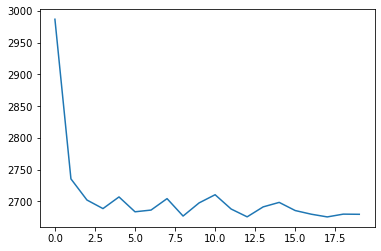

In [28]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.

## Example 4:  SGD on simple linear regression (Animated)

Let's keep in mind that the Gradient Descent method is one of the most widely used parameter optimization algorithms in machine learning today.


In [29]:
'''
This module allows us to create animated graphs during the gradient descent
'''
#pip install celluloid

'\nThis module allows us to create animated graphs during the gradient descent\n'

Mathematically, a straight line in two-dimensional space can be described with the following function:  
- y= w*x+b
     * with w representing the slope (or “weight) 
     * and b representing the y-intercept (or “bias”) of our line. 
     
There are numerous methods on how to determine the optimal values for w and b given our n data points. 
- The gradient descent algorithm aims to minimize the *mean squared error* between observed data points (y) and points we predicted with our regression line (ŷ). 
- The mean squared error is also being referred to as ‘cost function’ (or ‘costs’) usually denoted as J.

In [30]:
Image(url='img/cost_equation.png') 

Note that the cost function is only dependent on the parameters w and b.
--> We aim to adjust our parameters until the cost function reaches its minimum.
- here are the parameters we introduce the gradient of our cost function ∇J(w,b):

In [31]:
Image(url='img/cost_parameters.png') 

with δJ/δw and δJ/δb being the partial derivatives of J with respect to w and b respectively. 
* By constantly moving our parameters in the opposite direction of the current gradient ∇J, we can stepwise reduce the costs J. 
* The size of the steps we take to reach the (local/global) minimum of J is usually denoted as α and is also referred to as ‘learning rate’. 
* When training our model, our objective is to repeat the following for each epoch until we reach convergence:

In [32]:
Image(url='img/conv_sys.png') 

In [33]:
'''
Gradient descent algorithm can be sub-classified according to how much of the training 
data is being used simultaneously to compute the gradient of our cost function. 
In the following example, we use the entire dataset for every update respectively, 
which is also referred to as batch gradient descent. 
In Python we import some useful libraries and set up our simple linear regression model:
'''
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
import pandas_alive

In [34]:
import matplotlib.animation as manimation
manimation.writers.list()

['pillow', 'html']

In [35]:
# Simple linear regression model:
class LinearRegression(object):
    def __init__(self,w=1,b=1, lr=0.01): 
        self.lr=lr
        self.w=np.array([[w]])
        self.b=np.array([b])

    def cost(self,x,y):     
        pred = x@self.w+self.b  # predicted y-values
        e=y-pred             # error term
        return np.mean(e**2)  # mean squared error

    def fit(self, x,y):
        pred = x@self.w+self.b
        e=y-pred
        dJ_dw=(np.mean(e*(-2*x), axis=0)) # partial derivate of J with respect to w
        dJ_db=(np.mean(e*(-2),axis=0)) # partial derivate of J with respect to b
        self.w = (self.w.T-self.lr*dJ_dw).T  # update w
        self.b = self.b - self.lr*dJ_db    # update b

    def predict(self, x):
        return (x @ self.w.T + self.b)  # return predicted values

    def params(self):
        return (self.w,self.b)   # return parameters

We then want to introduce our training data, define the learning rate (α=0.001), initialize our starting parameters (w=3, b=-1), and finally train our model. For every epoch, we store the updated values of our parameters, the costs, and some particular predicted y-values in lists. List items are then being stored in numpy arrays where they serve as raw data for our animated plots.

In [36]:
# Introduce training data
x_train = np.array([     
    [1],
    [2],
    [4],
    [5],
    [6],
    [7]
])

y_train = np.array([     
    [4],
    [-12],
    [3],
    [-11],
    [-5],
    [-17]
])

In [37]:
# Introduce lists where data points are being stored: 
w_list=[]   # list contains weights
b_list=[]   # list contains biases
c_list=[]   # list contains costs 
ys_list=[]  # store arrays of predicted y-values for xs ( -> plot regression line!) 
cl_list = [] # list contains predicted y-values for x_train ( -> plot connecting lines!) 

xs= np.array([    # set x-values for regression line plot               
            [-3],
             [10]
             ])

In [38]:
# Train model: 
model=LinearRegression(w=3,b=-1,lr=0.001) # set initial parameters and learning rate 

for i in range(60000):      # set number of epochs
    w_list.append(model.params()[0])    # append weights (=slopes) to list
    b_list.append(model.params()[1])    # append biases (=y-intercepts) to list
    c_list.append(model.cost(x_train,y_train))  # append costs to list
    ys_list.append(model.predict(xs).T)     # append pairs of predicted y-values for xs 
    cl_list.append(model.predict(x_train).T) # append predicted y-values for x_train to list
    model.fit(x_train, y_train) # fit model


In [39]:
# print parameters and costs after all epochs
print("weight: " + str( model.params()[0]) )  
print("y-intercept: " + str( model.params()[1]) )
print("costs: "+ str(model.cost(x_train, y_train)))

weight: [[-2.]]
y-intercept: [2.]
costs: 42.66666666666668


Note that the particularly small learning rate of 0.001 was chosen on purpose to prevent overly large steps during the first epochs of gradient descent. A larger learning rate (e.g. α=0.1) usually results in faster model convergence requiring fewer epochs. However, overly large steps during the first epochs of gradient descent tend to result in less appealing animations or even failure to converge.

In [40]:
import sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[[-2.]]
[2.]


#### Animations of gradient descent (simple linear regression):

With our data points being generated and stored, we can now start to build some animations. We could, for example, plot the values our cost function and parameters take on with respect to the epoch while plotting the corresponding regression line simultaneously:

In [41]:
# Define which epochs/data points to plot
a=np.arange(0,50,1).tolist()
b=np.arange(50,100,5).tolist()
c=np.arange(100,12000,200).tolist()
p = a+b+c # points we want to plot

# Turn lists into arrays
w= np.array(w_list).flatten()
b= np.array(b_list).flatten()
c= np.array(c_list).flatten()
ys = np.array(ys_list) 
p=np.array(p)

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(1, 2, 1) # plot fit
<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance

<ipython-input-42-d9266e54ee20>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(1, 2, 1) # plot fit
<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance

<ipython-input-42-d9266e54ee20>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(1, 2, 1) # plot fit
<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a f

<ipython-input-42-d9266e54ee20>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-42-d9266e54ee20>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3=fig.add_subplot(3, 2, 6, sharex=ax1)
<ipython-input-42-d9266e54ee20>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier inst

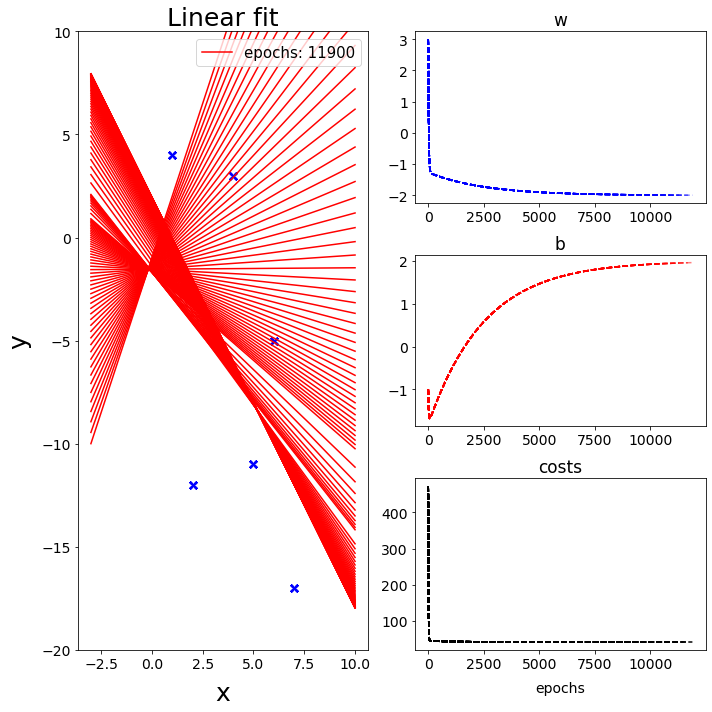

In [42]:
# Create first animation: 
fig = plt.figure(figsize=(10,10)) # create figure
labelsize_ = 14
camera = Camera(fig)  # create camera
for i in p:
    ax1=fig.add_subplot(3, 2, 2)  
    ax1.plot(w[0:i], color='blue', linestyle="dashed", alpha=0.5)
    ax1.set_title("w", fontsize=17)
    ax1.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis. 
    ax2.plot(b[0:i], color='red', linestyle="dashed", alpha=0.5)
    ax2.set_title("b", fontsize=17)
    ax2.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax3=fig.add_subplot(3, 2, 6, sharex=ax1) 
    ax3.plot(c[0:i],color='black',linestyle="dashed")
    ax3.set_title("costs", fontsize=17)
    ax3.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax3.set_xlabel("epochs", fontsize=14, labelpad=10)

    ax0=fig.add_subplot(1, 2, 1) # plot fit
    leg=ax0.plot(xs.T.flatten(),ys[i].flatten(),
                 color='r', label=str(i))  # set legend; flatten arrays to get plots!
    ax0.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax0.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15)
    ax0.set_title("Linear fit", fontsize=25)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax0.set_xlabel("x", fontsize=25, labelpad=10)
    ax0.set_ylabel("y", fontsize=25, labelpad=10)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
    ax0.set_ylim([-20, 10])

    plt.tight_layout()
    #camera.snap() # take snapshot after each frame/iteration
    
animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 500) # create animation 
#animation.save('SimpleLinReg_1.gif', writer = 'imagemagick') # save animation 

In my opinion, it makes sense to return the final values of J, w and b being plotted, so that we can make sure we roughly visualized model convergence in our animation despite not using all the points we stored during the fitting process. Especially in 3D-animations, it can sometimes be difficult to confirm the former just by looking at the graph.

In [43]:
# Print final parameters and costs portrayed in animations 
print("Slope: " + str(w[i])) 
print("y-intercept: " + str(b[i])) 
print("final costs: " + str(c[i]))

Slope: -1.9933280497098227
y-intercept: 1.9653553483257509
final costs: 42.6669125993761


<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-44-ccffa864b5ca>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-44-ccffa864b5ca>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-44-ccffa864b5ca>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

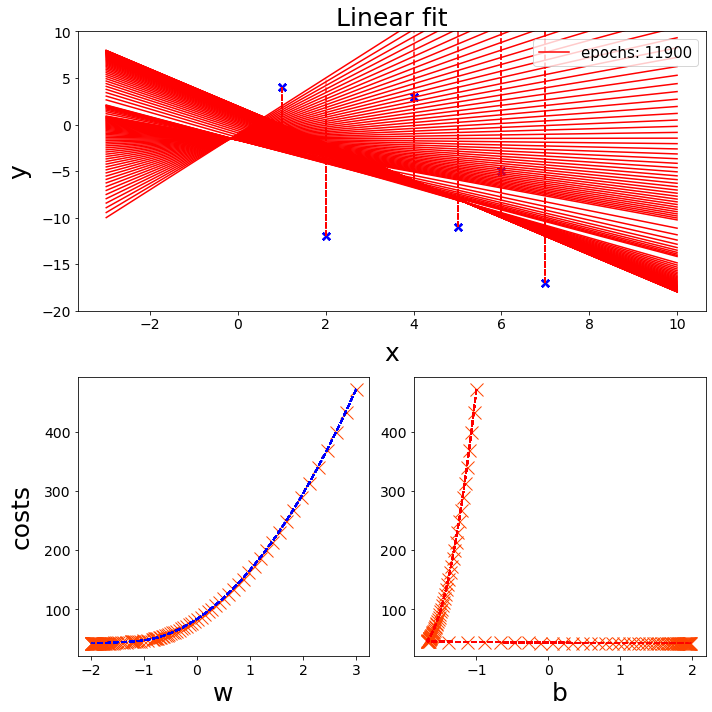

In [44]:
# Second animation
fig = plt.figure(figsize=(10,10))
camera = Camera(fig)

for i in p: # use the same points to plot as before 
    ax0=fig.add_subplot(2, 1, 1) 
    leg=ax0.plot(xs.T.flatten(),ys[i].flatten(), color='r', label=str(i))
    ax0.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax0.vlines(x_train.T, ymin=y_train.T, ymax=cl_list[i],
               linestyle="dashed",color='r',alpha=0.3)    # plot connecting lines
    ax0.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15)
    ax0.set_title("Linear fit", fontsize=25)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax0.set_xlabel("x", fontsize=25, labelpad=10)
    ax0.set_ylabel("y", fontsize=25, labelpad=10)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
    ax0.set_ylim([-20, 10])
    
    ax1=fig.add_subplot(2, 2, 3) 
    ax1.plot(w[i], c[i], marker='x', markersize=13, color="orangered")
    ax1.plot(np.array(w_list).flatten(),np.array(c_list).flatten() ,
             linestyle='dashed', color="blue")
    ax1.set_xlabel("w", fontsize=25)
    ax1.set_ylabel("costs", fontsize=25, labelpad=10)
    ax1.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax2=fig.add_subplot(2, 2, 4, sharey=ax1) 
    ax2.plot(b[i], c[i], marker='x', markersize=13, color="orangered")
    ax2.plot(np.array(b_list).flatten(),np.array(c_list).flatten() ,
             linestyle='dashed', color="red")
    ax2.set_xlabel("b", fontsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=labelsize_)
    
    plt.tight_layout()
    #camera.snap()
    
animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 500)
#animation.save('SimpleLinReg_2.gif', writer = 'imagemagick')

In [45]:
def cost_3d(x,y,w,b):  # predicts costs for every pair of w and b. 
        pred = x@w.T+b                       
        e=y-pred
        return np.mean(e**2)
        
ws = np.linspace(-5, 5.0, 10) # set range of values for w and b for surface plot
bs = np.linspace(-5, 5, 10)
M, B = np.meshgrid(ws, bs) # create meshgrid

zs = np.array([cost_3d(x_train,y_train,       # determine costs for each pair of w and b 
        np.array([[wp]]), np.array([[bp]]))  # cost_3d() only accepts wp and bp as matrices. 
               for wp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape) # get z-values for surface plot in shape of M.

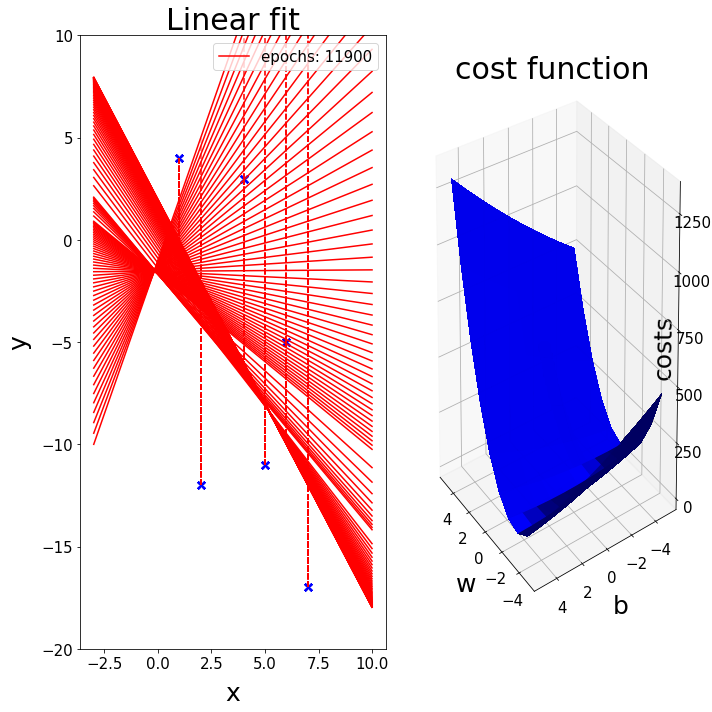

In [46]:
# Third Animation
fig = plt.figure(figsize=(10,10))  
ax1=fig.add_subplot(121)
ax1.set_title("Linear fit", fontsize=30 )
ax2 = fig.add_subplot(122, projection='3d') # projection='3d'
ax2.set_title("cost function", fontsize=30)
ax2.view_init(elev=20., azim=145)           # set view
camera = Camera(fig)

for i in p:       
    leg=ax1.plot(xs.T.flatten(),ys[i].flatten(), color='r', label=str(i))  
    ax1.vlines(x_train.T, ymin=y_train.T, ymax=cl_list[i], linestyle="dashed",
               color='r',alpha=0.3)
    ax1.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax1.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15) 
    ax1.set_xlabel("x", fontsize=25, labelpad=10)
    ax1.set_ylabel("y", fontsize=25, labelpad=10)
    ax1.tick_params(axis='both', which='major', labelsize=15) 
    ax1.set_ylim([-20, 10])
    
    ax2.plot_surface(M, B, Z, rstride=1, cstride=1, color='b',
                     alpha=0.35) # create surface plot
    ax2.scatter(w[i],b[i],c[i],marker='o', s=12**2, color='orange' )
    ax2.set_xlabel("w", fontsize=25, labelpad=10)
    ax2.set_ylabel("b", fontsize=25, labelpad=10)
    ax2.set_zlabel("costs", fontsize=25,
    labelpad=-35) # negative value for labelpad places z-label left of z-axis.
    ax2.tick_params(axis='both', which='major', labelsize=15) 
    ax2.plot(w[0:i],b[0:i],c[0:i], linestyle="dashed",linewidth=2,
             color="grey") # (dashed) lineplot
    
    plt.tight_layout()
    #camera.snap()
    
animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 500)
#animation.save('SimpleLinReg_3.gif', writer = 'imagemagick')

## Example 5: Stochastic Gradient Descent in Continuous time -- Scopus Article remake

## Stochastic Gradient Descent in Continuous time -- Scopus Article remake

**Abstract**

Stochastic gradient descent in continuous time **(SGDCT)** provides a computationally eficient method for the statistical learning of continuous-Time models, which are widely used in science, engineering, and **finance**. 

The SGDCT algorithm follows a (noisy) descent direction along a continuous stream of data. SGDCT performs an online parameter update in continuous time with the parameter updates **θt**, satisfying a stochastic diffierential equation. 

We prove that **limδ rg(θ) = 0**, where **g** is anatural objective function for the estimation of the continuous-Time dynamics. 

The convergence proof leverages ergodicity by using an appropriate Poisson equation to help describe the evolution of the parameters for large times. 

For certain continuous-Time problems, SGDCT has some promising advantages compared to a traditional stochastic gradient descent algorithm. 

This paper mainly focuses **on applications in finance**, such as model estimation for stocks, bonds, interest rates, and financial derivatives. 

SGDCT can also be used for the optimization of high-dimensional continuous-time models, such as American options. As an example application, SGDCT is combined with a deep neural network to price high-dimensional American options (up to 100 dimensions).

Author keywords

*American options; Deep learning; Machine learning; Statistical learning; Stochastic difierential equations; Stochastic gradient descent*

source: https://www.scopus.com/record/display.uri?eid=2-s2.0-85041577966&origin=inward&txGid=b958c8de8483660591ca27e29596028b

Link to the pdf:
    >> https://arxiv.org/pdf/1611.05545.pdf


Authors: **Justin Sirignano, Konstantinos Spiliopoulos**

## Stochastic Gradient Descent in Continuous Time: A Central Limit Theorem

**Abstract**

Stochastic gradient descent in continuous time (SGDCT) provides a computationally efficient method for the statistical learning of continuous-time models, which are widely used in science, engineering, and finance. 

The SGDCT algorithm follows a (noisy) descent direction along a continuous stream of data. The parameter updates occur in continuous time and satisfy a stochastic differential equation. 

This paper analyzes the **asymptotic convergence rate** of the SGDCT algorithm by proving a central limit theorem (CLT) for strongly convex objective functions and, under slightly stronger conditions, for non-convex objective functions as well. 

An Lp convergence rate is also proven for the algorithm in the strongly convex case. The mathematical analysis lies at the intersection of stochastic analysis and statistical learning. 

Author keywords

*American options; Deep learning; Machine learning; Statistical learning; Stochastic difierential equations; Stochastic gradient descent*

source: https://arxiv.org/abs/1710.04273

Link to the article: https://arxiv.org/pdf/1710.04273.pdf

Authors: **Justin Sirignano, Konstantinos Spiliopoulos**

Interesting github repo
> https://github.com/cloudy-sfu/SGD-Implied-Volatility